<a href="https://colab.research.google.com/github/fahadrafiq94/Deep-Learning/blob/main/Plant_Village.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Village

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [2]:
!nvidia-smi

Mon Feb  7 10:49:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Get the Dataset 

In [3]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 31.92 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [4]:
input_dir = "/content/PlantVillage-Dataset/raw/color"

## Train and test folders

In [5]:
!pip install split-folders
import splitfolders

In [6]:
splitfolders.ratio(input=input_dir , output="PlantVillage_split",
                   seed=42,
                   ratio=(0.8 ,0.2))

Copying files: 54305 files [00:22, 2365.57 files/s]


In [7]:
import os 
def check_folder(foldername):
  for dirpath , dirname , filenames in os.walk(foldername):
    print(f"There are {len(dirname)} Directories and {len(filenames)} files in {dirpath}")

In [8]:
check_folder("PlantVillage_split")

There are 2 Directories and 0 files in PlantVillage_split
There are 38 Directories and 0 files in PlantVillage_split/val
There are 0 Directories and 197 files in PlantVillage_split/val/Corn_(maize)___Northern_Leaf_Blight
There are 0 Directories and 31 files in PlantVillage_split/val/Potato___healthy
There are 0 Directories and 211 files in PlantVillage_split/val/Cherry_(including_sour)___Powdery_mildew
There are 0 Directories and 103 files in PlantVillage_split/val/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
There are 0 Directories and 319 files in PlantVillage_split/val/Tomato___healthy
There are 0 Directories and 126 files in PlantVillage_split/val/Apple___Apple_scab
There are 0 Directories and 1018 files in PlantVillage_split/val/Soybean___healthy
There are 0 Directories and 171 files in PlantVillage_split/val/Cherry_(including_sour)___healthy
There are 0 Directories and 75 files in PlantVillage_split/val/Tomato___Tomato_mosaic_virus
There are 0 Directories and 355 files in P

Train and test Dataset 

In [9]:
train_dir = "/content/PlantVillage_split/train"
val_dir = "/content/PlantVillage_split/val"

In [10]:
IMAGE_SIZE =(224,224)
BATCH_SIZE =32

In [11]:
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                         image_size=IMAGE_SIZE,
                                                         batch_size = BATCH_SIZE)
val_data = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                       label_mode="categorical",
                                                       image_size=IMAGE_SIZE,
                                                       batch_size = BATCH_SIZE,
                                                       shuffle=False)

Found 43429 files belonging to 38 classes.
Found 10876 files belonging to 38 classes.


In [12]:
class_names = train_data.class_names
class_names ,len(class_names)

(['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy',
  'Blueberry___healthy',
  'Cherry_(including_sour)___Powdery_mildew',
  'Cherry_(including_sour)___healthy',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___healthy',
  'Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
  'Grape___healthy',
  'Orange___Haunglongbing_(Citrus_greening)',
  'Peach___Bacterial_spot',
  'Peach___healthy',
  'Pepper,_bell___Bacterial_spot',
  'Pepper,_bell___healthy',
  'Potato___Early_blight',
  'Potato___Late_blight',
  'Potato___healthy',
  'Raspberry___healthy',
  'Soybean___healthy',
  'Squash___Powdery_mildew',
  'Strawberry___Leaf_scorch',
  'Strawberry___healthy',
  'Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  '

## Callbacks

In [ ]:
checkpoint_path = "/content/Model_checkpoints"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                         monitor="val_accuracy",
                                                         save_best_only=True,
                                                         save_weights_only=True)

## Modeling

### Model_2 : EfficientNetb7 (Augmentation)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

Augmented_layer = tf.keras.Sequential([
       preprocessing.RandomFlip("horizontal"),
       preprocessing.RandomRotation(0.2),
       preprocessing.RandomWidth(0.2),
       preprocessing.RandomHeight(0.2),
       preprocessing.RandomZoom(0.2)],
       name="Augmented_layer")

#### Model_2: Feature Extraction

In [ ]:
from tensorflow.python.ops.init_ops_v2 import Initializer
base_model = tf.keras.applications.EfficientNetB7(include_top=False)
base_model.trainable=False
inputs = tf.keras.Input(shape=(224,224,3) ,name="input_layer")
x = Augmented_layer(inputs)
x = base_model(x , training =False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_2D")(x)
outputs = tf.keras.layers.Dense(38 , activation="softmax" , name="output_layer")(x)
model_2 = tf.keras.Model(inputs ,  outputs , name="Feature_Extraction_Aug_Model")

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model 
history_model_2 = model_2.fit(train_data,
                              epochs=5,
                              steps_per_epoch =len(train_data),
                              validation_data=val_data,
                              validation_steps=int(0.15*len(val_data)),
                              callbacks=[checkpoint_callback])

258088960/258076736 [==============================] - 10s 0us/step
Epoch 1/5
1358/1358 [==============================] - 956s 684ms/step - loss: 0.6810 - accuracy: 0.8236 - val_loss: 0.3472 - val_accuracy: 0.9136
Epoch 2/5
1358/1358 [==============================] - 705s 519ms/step - loss: 0.3080 - accuracy: 0.9130 - val_loss: 0.2370 - val_accuracy: 0.9381
Epoch 3/5
1358/1358 [==============================] - 625s 460ms/step - loss: 0.2435 - accuracy: 0.9275 - val_loss: 0.2413 - val_accuracy: 0.9314
Epoch 4/5
1358/1358 [==============================] - 594s 437ms/step - loss: 0.2077 - accuracy: 0.9363 - val_loss: 0.1802 - val_accuracy: 0.9516
Epoch 5/5
1358/1358 [==============================] - 568s 418ms/step - loss: 0.1872 - accuracy: 0.9431 - val_loss: 0.1704 - val_accuracy: 0.9553



Downloading data from https://storage.googleapis.com/keras-applications/efficientnetb7_notop.h5
258080768/258076736 [==============================] - 10s 0us/step

258088960/258076736 [==============================] - 10s 0us/step

Epoch 1/5
1358/1358 [==============================] - 956s 684ms/step - loss: 0.6810 - accuracy: 0.8236 - val_loss: 0.3472 - val_accuracy: 0.9136

Epoch 2/5
1358/1358 [==============================] - 705s 519ms/step - loss: 0.3080 - accuracy: 0.9130 - val_loss: 0.2370 - val_accuracy: 0.9381

Epoch 3/5
1358/1358 [==============================] - 625s 460ms/step - loss: 0.2435 - accuracy: 0.9275 - val_loss: 0.2413 - val_accuracy: 0.9314

Epoch 4/5
1358/1358 [==============================] - 594s 437ms/step - loss: 0.2077 - accuracy: 0.9363 - val_loss: 0.1802 - val_accuracy: 0.9516

Epoch 5/5
1358/1358 [==============================] - 568s 418ms/step - loss: 0.1872 - accuracy: 0.9431 - val_loss: 0.1704 - val_accuracy: 0.9553

In [ ]:
model_2_eval_feature = model_2.evaluate(val_data)
model_2_eval_feature

340/340 [==============================] - 128s 378ms/step - loss: 0.1191 - accuracy: 0.9617


[0.11912571638822556, 0.9616587162017822]

340/340 [==============================] - 130s 382ms/step - loss: 0.2165 - accuracy: 0.9350

[0.21649467945098877, 0.9349944591522217]

In [ ]:
model_2.save("/content/drive/MyDrive/Saved_Model/EfficientB7_Aug/model_2_Aug.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


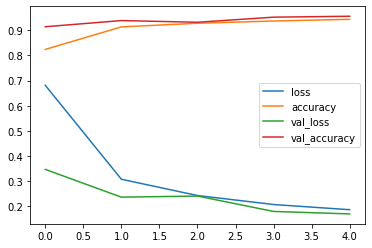

In [ ]:
pd.DataFrame(history_model_2.history).plot()

#### Model_2: Fine Tuning

In [ ]:
from tensorflow.python.training.tracking import base
base_model.trainable =True

for layer in base_model.layers[:-5]:
  layer.trainable =False 

In [ ]:
# Recompile the model 
model_2.compile(loss = "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=["accuracy"])

In [ ]:
for layer in model_2.layers:
  print(layer.name , layer.trainable)

input_layer True
Augmented_layer True
efficientnetb7 True
global_avg_pooling_2D True
output_layer True


In [ ]:
for layer_number ,layer in enumerate(base_model.layers):
  print(layer_number , layer.name , layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block1c_dwconv False
30 block1c_bn False
31 block1c_activation False
32 block1c_se_squeeze False
33 block1c_se_reshape False
34 block1c_se_reduce False
35 block1c_se_expand False
36 block1c_se_excite False
37 block1c_project_conv False
38 block1c_project_bn False
39 block1c_drop False
4

In [ ]:
fine_tune_epochs  = 10 

history_model_2_finetune = model_2.fit(train_data,
                                       epochs=fine_tune_epochs,
                                       validation_data=val_data,
                                       validation_steps=int(0.15 * len(val_data)),
                                       initial_epoch = history_model_2.epoch[-1])

Epoch 5/10
1358/1358 [==============================] - 593s 417ms/step - loss: 0.1677 - accuracy: 0.9461 - val_loss: 0.1405 - val_accuracy: 0.9602
Epoch 6/10
1358/1358 [==============================] - 551s 406ms/step - loss: 0.1397 - accuracy: 0.9538 - val_loss: 0.0945 - val_accuracy: 0.9730
Epoch 7/10
1358/1358 [==============================] - 548s 403ms/step - loss: 0.1238 - accuracy: 0.9583 - val_loss: 0.0970 - val_accuracy: 0.9743
Epoch 8/10
1358/1358 [==============================] - 544s 401ms/step - loss: 0.1131 - accuracy: 0.9621 - val_loss: 0.0900 - val_accuracy: 0.9749
Epoch 9/10
1358/1358 [==============================] - 541s 398ms/step - loss: 0.1039 - accuracy: 0.9652 - val_loss: 0.1238 - val_accuracy: 0.9651
Epoch 10/10
1358/1358 [==============================] - 537s 395ms/step - loss: 0.0943 - accuracy: 0.9690 - val_loss: 0.1000 - val_accuracy: 0.9700


Epoch 5/10
1358/1358 [==============================] - 593s 417ms/step - loss: 0.1677 - accuracy: 0.9461 - val_loss: 0.1405 - val_accuracy: 0.9602

Epoch 6/10
1358/1358 [==============================] - 551s 406ms/step - loss: 0.1397 - accuracy: 0.9538 - val_loss: 0.0945 - val_accuracy: 0.9730

Epoch 7/10
1358/1358 [==============================] - 548s 403ms/step - loss: 0.1238 - accuracy: 0.9583 - val_loss: 0.0970 - val_accuracy: 0.9743

Epoch 8/10
1358/1358 [==============================] - 544s 401ms/step - loss: 0.1131 - accuracy: 0.9621 - val_loss: 0.0900 - val_accuracy: 0.9749

Epoch 9/10
1358/1358 [==============================] - 541s 398ms/step - loss: 0.1039 - accuracy: 0.9652 - val_loss: 0.1238 - val_accuracy: 0.9651

Epoch 10/10
1358/1358 [==============================] - 537s 395ms/step - loss: 0.0943 - accuracy: 0.9690 - val_loss: 0.1000 - val_accuracy: 0.9700

In [ ]:
model_2.summary()

Model: "Feature_Extraction_Aug_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Augmented_layer (Sequential  (None, None, None, 3)    0         
 )                                                               
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_avg_pooling_2D (Glob  (None, 2560)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 38)                97318     
                                                                 
Total params: 64,195,005
Trainable par

In [ ]:
model_2_eval = model_2.evaluate(val_data)
model_2_eval

340/340 [==============================] - 128s 378ms/step - loss: 0.1191 - accuracy: 0.9617


[0.11912571638822556, 0.9616587162017822]

340/340 [==============================] - 130s 382ms/step - loss: 0.1191 - accuracy: 0.9617

[0.11912571638822556, 0.9616587162017822]

In [ ]:
model_2.save("/content/drive/MyDrive/Saved_Model/EfficientB7_Aug/model_2_Aug_fine_tuned.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### Compare Histories 

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

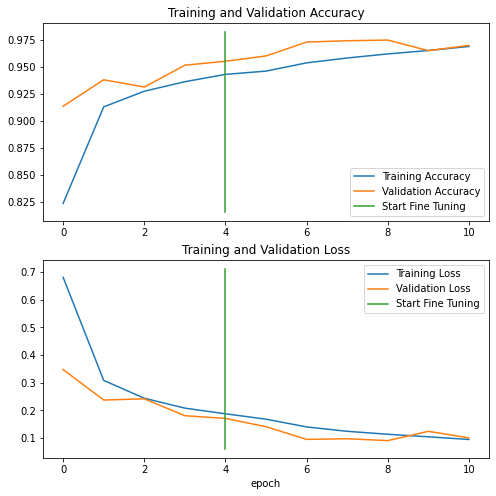

In [ ]:
compare_historys(history_model_2 , history_model_2_finetune)

### Model_1 : EfficientNetb7

#### Model_1: Feature Extraction

In [ ]:
# Creata the base model 
base_model =  tf.keras.applications.EfficientNetB7(include_top=False)
# Freeze the layers 
base_model.trainable = False 
# set the inputs 
inputs = tf.keras.layers.Input(shape=(224,224,3) ,name ="input_layer")
# gave inputs to base model 
x = base_model(inputs)
# Global Average pooling layer 
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_2D")(x)
# create the output layer 
outputs = tf.keras.layers.Dense(38 , activation="softmax" , name="output_layer")(x)
# create the model 
model_1 = tf.keras.Model(inputs ,outputs , name="Feature_Extraction_No_Aug_Model")

# Compile the Model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the Model
history_model_1 = model_1.fit(train_data,
                              epochs=5,
                              validation_data=val_data,
                              validation_steps=int(0.15 * len(val_data)),
                              callbacks=[checkpoint_callback])

Epoch 1/5
1358/1358 [==============================] - 567s 404ms/step - loss: 0.5874 - accuracy: 0.8547 - val_loss: 0.2532 - val_accuracy: 0.9320
Epoch 2/5
1358/1358 [==============================] - 543s 399ms/step - loss: 0.2296 - accuracy: 0.9367 - val_loss: 0.1705 - val_accuracy: 0.9528
Epoch 3/5
1358/1358 [==============================] - 543s 400ms/step - loss: 0.1700 - accuracy: 0.9524 - val_loss: 0.1229 - val_accuracy: 0.9681
Epoch 4/5
1358/1358 [==============================] - 546s 402ms/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.1232 - val_accuracy: 0.9632
Epoch 5/5
1358/1358 [==============================] - 543s 399ms/step - loss: 0.1226 - accuracy: 0.9645 - val_loss: 0.0981 - val_accuracy: 0.9718


Epoch 1/5
1358/1358 [==============================] - 567s 404ms/step - loss: 0.5874 - accuracy: 0.8547 - val_loss: 0.2532 - val_accuracy: 0.9320

Epoch 2/5
1358/1358 [==============================] - 543s 399ms/step - loss: 0.2296 - accuracy: 0.9367 - val_loss: 0.1705 - val_accuracy: 0.9528

Epoch 3/5
1358/1358 [==============================] - 543s 400ms/step - loss: 0.1700 - accuracy: 0.9524 - val_loss: 0.1229 - val_accuracy: 0.9681

Epoch 4/5
1358/1358 [==============================] - 546s 402ms/step - loss: 0.1406 - accuracy: 0.9588 - val_loss: 0.1232 - val_accuracy: 0.9632

Epoch 5/5
1358/1358 [==============================] - 543s 399ms/step - loss: 0.1226 - accuracy: 0.9645 - val_loss: 0.0981 - val_accuracy: 0.9718

In [ ]:
model_1_eval_feature = model_1.evaluate(val_data)
model_1_eval_feature

340/340 [==============================] - 129s 379ms/step - loss: 0.0629 - accuracy: 0.9788


[0.06285080313682556, 0.9787606000900269]

340/340 [==============================] - 128s 377ms/step - loss: 0.1076 - accuracy: 0.9681

[0.10758356750011444, 0.9680948853492737]

In [ ]:
model_1.save("/content/drive/MyDrive/Saved_Model/EfficientB7/model_1")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Saved_Model/EfficientB7/model_1/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


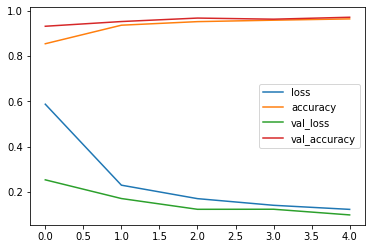

In [ ]:
pd.DataFrame(history_model_1.history).plot()

#### Model_1: Fine Tuning

In [ ]:
base_model.trainable =True

for layer in base_model.layers[:-5]:
  layer.trainable =False 

In [ ]:
# Recompile the model 
model_1.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(1e-4),
                metrics=["accuracy"])

In [ ]:
for layer in model_2.layers:
  print(layer.name , layer.trainable)

input_layer True
Augmented_layer True
efficientnetb7 True
global_avg_pooling_2D True
output_layer True


In [ ]:
for layer_number , layer in enumerate(base_model.layers):
  print(layer_number , layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block1b_dwconv False
18 block1b_bn False
19 block1b_activation False
20 block1b_se_squeeze False
21 block1b_se_reshape False
22 block1b_se_reduce False
23 block1b_se_expand False
24 block1b_se_excite False
25 block1b_project_conv False
26 block1b_project_bn False
27 block1b_drop False
28 block1b_add False
29 block1c_dwconv False
30 block1c_bn False
31 block1c_activation False
32 block1c_se_squeeze False
33 block1c_se_reshape False
34 block1c_se_reduce False
35 block1c_se_expand False
36 block1c_se_excite False
37 block1c_project_conv False
38 block1c_project_bn False
39 block1c_drop Fal

In [ ]:
# Fit the model 
history_model_1_finetune = model_1.fit(train_data,
                                       epochs=10,
                                       validation_data=val_data,
                                       validation_steps=int(0.15*len(val_data)),
                                       initial_epoch=history_model_1.epoch[-1])

Epoch 5/10
1358/1358 [==============================] - 574s 408ms/step - loss: 0.1153 - accuracy: 0.9631 - val_loss: 0.0977 - val_accuracy: 0.9712
Epoch 6/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0716 - accuracy: 0.9765 - val_loss: 0.0636 - val_accuracy: 0.9804
Epoch 7/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0551 - accuracy: 0.9819 - val_loss: 0.0826 - val_accuracy: 0.9724
Epoch 8/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0468 - accuracy: 0.9845 - val_loss: 0.0573 - val_accuracy: 0.9816
Epoch 9/10
1358/1358 [==============================] - 544s 401ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0507 - val_accuracy: 0.9828
Epoch 10/10
1358/1358 [==============================] - 544s 400ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0505 - val_accuracy: 0.9853


Epoch 5/10
1358/1358 [==============================] - 574s 408ms/step - loss: 0.1153 - accuracy: 0.9631 - val_loss: 0.0977 - val_accuracy: 0.9712

Epoch 6/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0716 - accuracy: 0.9765 - val_loss: 0.0636 - val_accuracy: 0.9804

Epoch 7/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0551 - accuracy: 0.9819 - val_loss: 0.0826 - val_accuracy: 0.9724

Epoch 8/10
1358/1358 [==============================] - 545s 401ms/step - loss: 0.0468 - accuracy: 0.9845 - val_loss: 0.0573 - val_accuracy: 0.9816

Epoch 9/10
1358/1358 [==============================] - 544s 401ms/step - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0507 - val_accuracy: 0.9828

Epoch 10/10
1358/1358 [==============================] - 544s 400ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0505 - val_accuracy: 0.9853

In [ ]:
model_1.summary()

Model: "Feature_Extraction_No_Aug_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 global_avg_pooling_2D (Glob  (None, 2560)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 38)                97318     
                                                                 
Total params: 64,195,005
Trainable params: 1,740,838
Non-trainable params: 62,454,167
_________________________________________________________________


In [ ]:
model_1_eval = model_1.evaluate(val_data)
model_1_eval

340/340 [==============================] - 129s 378ms/step - loss: 0.0629 - accuracy: 0.9788


[0.06285080313682556, 0.9787606000900269]

340/340 [==============================] - 128s 377ms/step - loss: 0.0629 - accuracy: 0.9788

[0.06285080313682556, 0.9787606000900269]

In [ ]:
model_1.save("/content/drive/MyDrive/Saved_Model/EfficientB7/model_1_fine_tuned")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Saved_Model/EfficientB7/model_1_fine_tuned/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


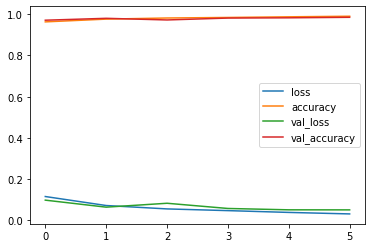

In [ ]:
pd.DataFrame(history_model_1_finetune.history).plot()

#### Compare Histories

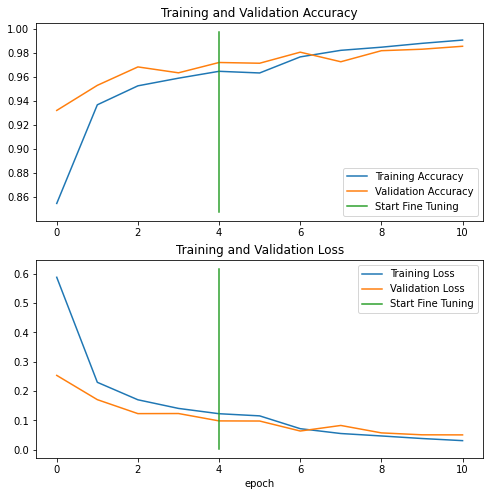

In [ ]:
compare_historys(history_model_1 , history_model_1_finetune)

## Loading and Evaluating saved models 

In [ ]:
loaded_model_1 = tf.keras.models.load_model("/content/drive/MyDrive/Saved_Model/EfficientB7/model_1")

In [ ]:
loaded_model_1_feature_eval = loaded_model_1.evaluate(val_data)
loaded_model_1_feature_eval

340/340 [==============================] - 135s 382ms/step - loss: 0.1076 - accuracy: 0.9681


[0.10758356750011444, 0.9680948853492737]

340/340 [==============================] - 135s 382ms/step - loss: 0.1076 - accuracy: 0.9681

[0.10758356750011444, 0.9680948853492737]

In [ ]:
loaded_model_1_finetune =  tf.keras.models.load_model("/content/drive/MyDrive/Saved_Model/EfficientB7/model_1_fine_tuned")

In [ ]:
loaded_model_1_eval = loaded_model_1_finetune.evaluate(val_data)
loaded_model_1_eval

340/340 [==============================] - 135s 383ms/step - loss: 0.0629 - accuracy: 0.9788


[0.06285080313682556, 0.9787606000900269]

340/340 [==============================] - 135s 383ms/step - loss: 0.0629 - accuracy: 0.9788

[0.06285080313682556, 0.9787606000900269]

In [ ]:
loaded_model_2 =  tf.keras.models.load_model("/content/drive/MyDrive/Saved_Model/EfficientB7_Aug/model_2_Aug.h5")

In [ ]:
loaded_model_2_feature_eval = loaded_model_2.evaluate(val_data)
loaded_model_2_feature_eval

340/340 [==============================] - 138s 379ms/step - loss: 0.4524 - accuracy: 0.8603


[0.45237043499946594, 0.8603346943855286]

340/340 [==============================] - 138s 379ms/step - loss: 0.4524 - accuracy: 0.8603

[0.45237043499946594, 0.8603346943855286]

In [ ]:
loaded_model_2_finetune =  tf.keras.models.load_model("/content/drive/MyDrive/Saved_Model/EfficientB7_Aug/model_2_Aug_fine_tuned.h5")

In [ ]:
loaded_model_2_eval = loaded_model_2_finetune.evaluate(val_data)
loaded_model_2_eval

340/340 [==============================] - 133s 378ms/step - loss: 0.3824 - accuracy: 0.8858


[0.3823741376399994, 0.8858035802841187]

340/340 [==============================] - 133s 378ms/step - loss: 0.3824 - accuracy: 0.8858

[0.3823741376399994, 0.8858035802841187]

In [ ]:
eval_dict = {"Model_1" : model_1_eval_feature,
           "Loaded_Model_1" : loaded_model_1_feature_eval,
           "Model_1_finetune" : model_1_eval,
           "Loaded_Model_1_finetune" : loaded_model_1_eval,
           "Model_2" : model_2_eval_feature,
           "Loaded_Model_2" : loaded_model_2_feature_eval,
           "Model_2_finetune" : model_2_eval,
           "Loaded_Model_2_finetune" : loaded_model_2_eval}

In [ ]:
pd.DataFrame(eval_dict)

,Model_1,Loaded_Model_1,Model_1_finetune,Loaded_Model_1_finetune,Model_2,Loaded_Model_2,Model_2_finetune,Loaded_Model_2_finetune
0,0.062851,0.107584,0.062851,0.062851,0.119126,0.452370,0.119126,0.382374
1,0.978761,0.968095,0.978761,0.978761,0.961659,0.860335,0.961659,0.885804


## Evaluating the prediction 

In [13]:
import tensorflow as tf 

In [13]:
model=  tf.keras.models.load_model("/content/drive/MyDrive/Saved_Model/EfficientB7/model_1_fine_tuned")

In [14]:
loaded_loss ,  loaded_accuracy = model.evaluate(val_data)
loaded_loss ,  loaded_accuracy

340/340 [==============================] - 287s 794ms/step - loss: 0.0629 - accuracy: 0.9788


(0.06285081803798676, 0.9787606000900269)

### Making Preiction with our trained model

In [15]:
pred_probs = model.predict(val_data , verbose=1)

340/340 [==============================] - 266s 767ms/step


In [16]:
len(pred_probs)

10876

In [17]:
# What's the shape of our predictions?
pred_probs.shape

(10876, 38)

In [18]:
pred_probs[:10]

array([[9.99880791e-01, 1.05040769e-07, 4.45850819e-05, 4.29327798e-07,
        6.00447990e-12, 5.90701674e-08, 5.78742124e-11, 2.13056447e-11,
        6.01706835e-12, 1.49550594e-08, 1.55113283e-10, 1.73789729e-08,
        7.57926708e-11, 3.45316766e-06, 6.18384718e-11, 1.31869099e-10,
        2.05415436e-05, 7.12396114e-11, 3.63141936e-07, 8.13831712e-15,
        3.01197076e-07, 8.95734775e-06, 1.64376013e-13, 1.70312564e-09,
        5.14432802e-11, 4.80799289e-10, 6.39292796e-09, 6.36060510e-11,
        3.98071534e-05, 2.69197898e-07, 3.07053625e-07, 1.99766448e-09,
        2.99128153e-08, 1.00257784e-14, 1.79036093e-08, 4.94714159e-10,
        1.26346230e-14, 2.66297292e-12],
       [9.99294162e-01, 3.74987280e-07, 1.60175557e-06, 7.00056611e-04,
        1.06465627e-08, 1.61487264e-06, 2.15048215e-10, 1.34870337e-09,
        7.29703082e-13, 5.19043546e-08, 8.29183222e-10, 7.20940798e-12,
        4.65347216e-13, 7.58221097e-10, 5.03675435e-11, 6.22109830e-09,
        1.30922376e-06,

In [19]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 38
What prediction probability sample 0 looks like:
 [9.99880791e-01 1.05040769e-07 4.45850819e-05 4.29327798e-07
 6.00447990e-12 5.90701674e-08 5.78742124e-11 2.13056447e-11
 6.01706835e-12 1.49550594e-08 1.55113283e-10 1.73789729e-08
 7.57926708e-11 3.45316766e-06 6.18384718e-11 1.31869099e-10
 2.05415436e-05 7.12396114e-11 3.63141936e-07 8.13831712e-15
 3.01197076e-07 8.95734775e-06 1.64376013e-13 1.70312564e-09
 5.14432802e-11 4.80799289e-10 6.39292796e-09 6.36060510e-11
 3.98071534e-05 2.69197898e-07 3.07053625e-07 1.99766448e-09
 2.99128153e-08 1.00257784e-14 1.79036093e-08 4.94714159e-10
 1.26346230e-14 2.66297292e-12]
The class with the highest predicted probability by the model for sample 0: 0


In [20]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:1000]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [21]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 38)), types: (tf.float32, tf.float32)>

In [22]:
y_labels = []
for images , labels in val_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
y_labels[:1000]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [24]:
len(y_labels)

10876

### Evaluating our model prediction  

In [25]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.9787605737403458

In [26]:
# Does the evaluate method compare to the Scikit-Learn measured accuracy?
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 2.6349681103710054e-08


In [27]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

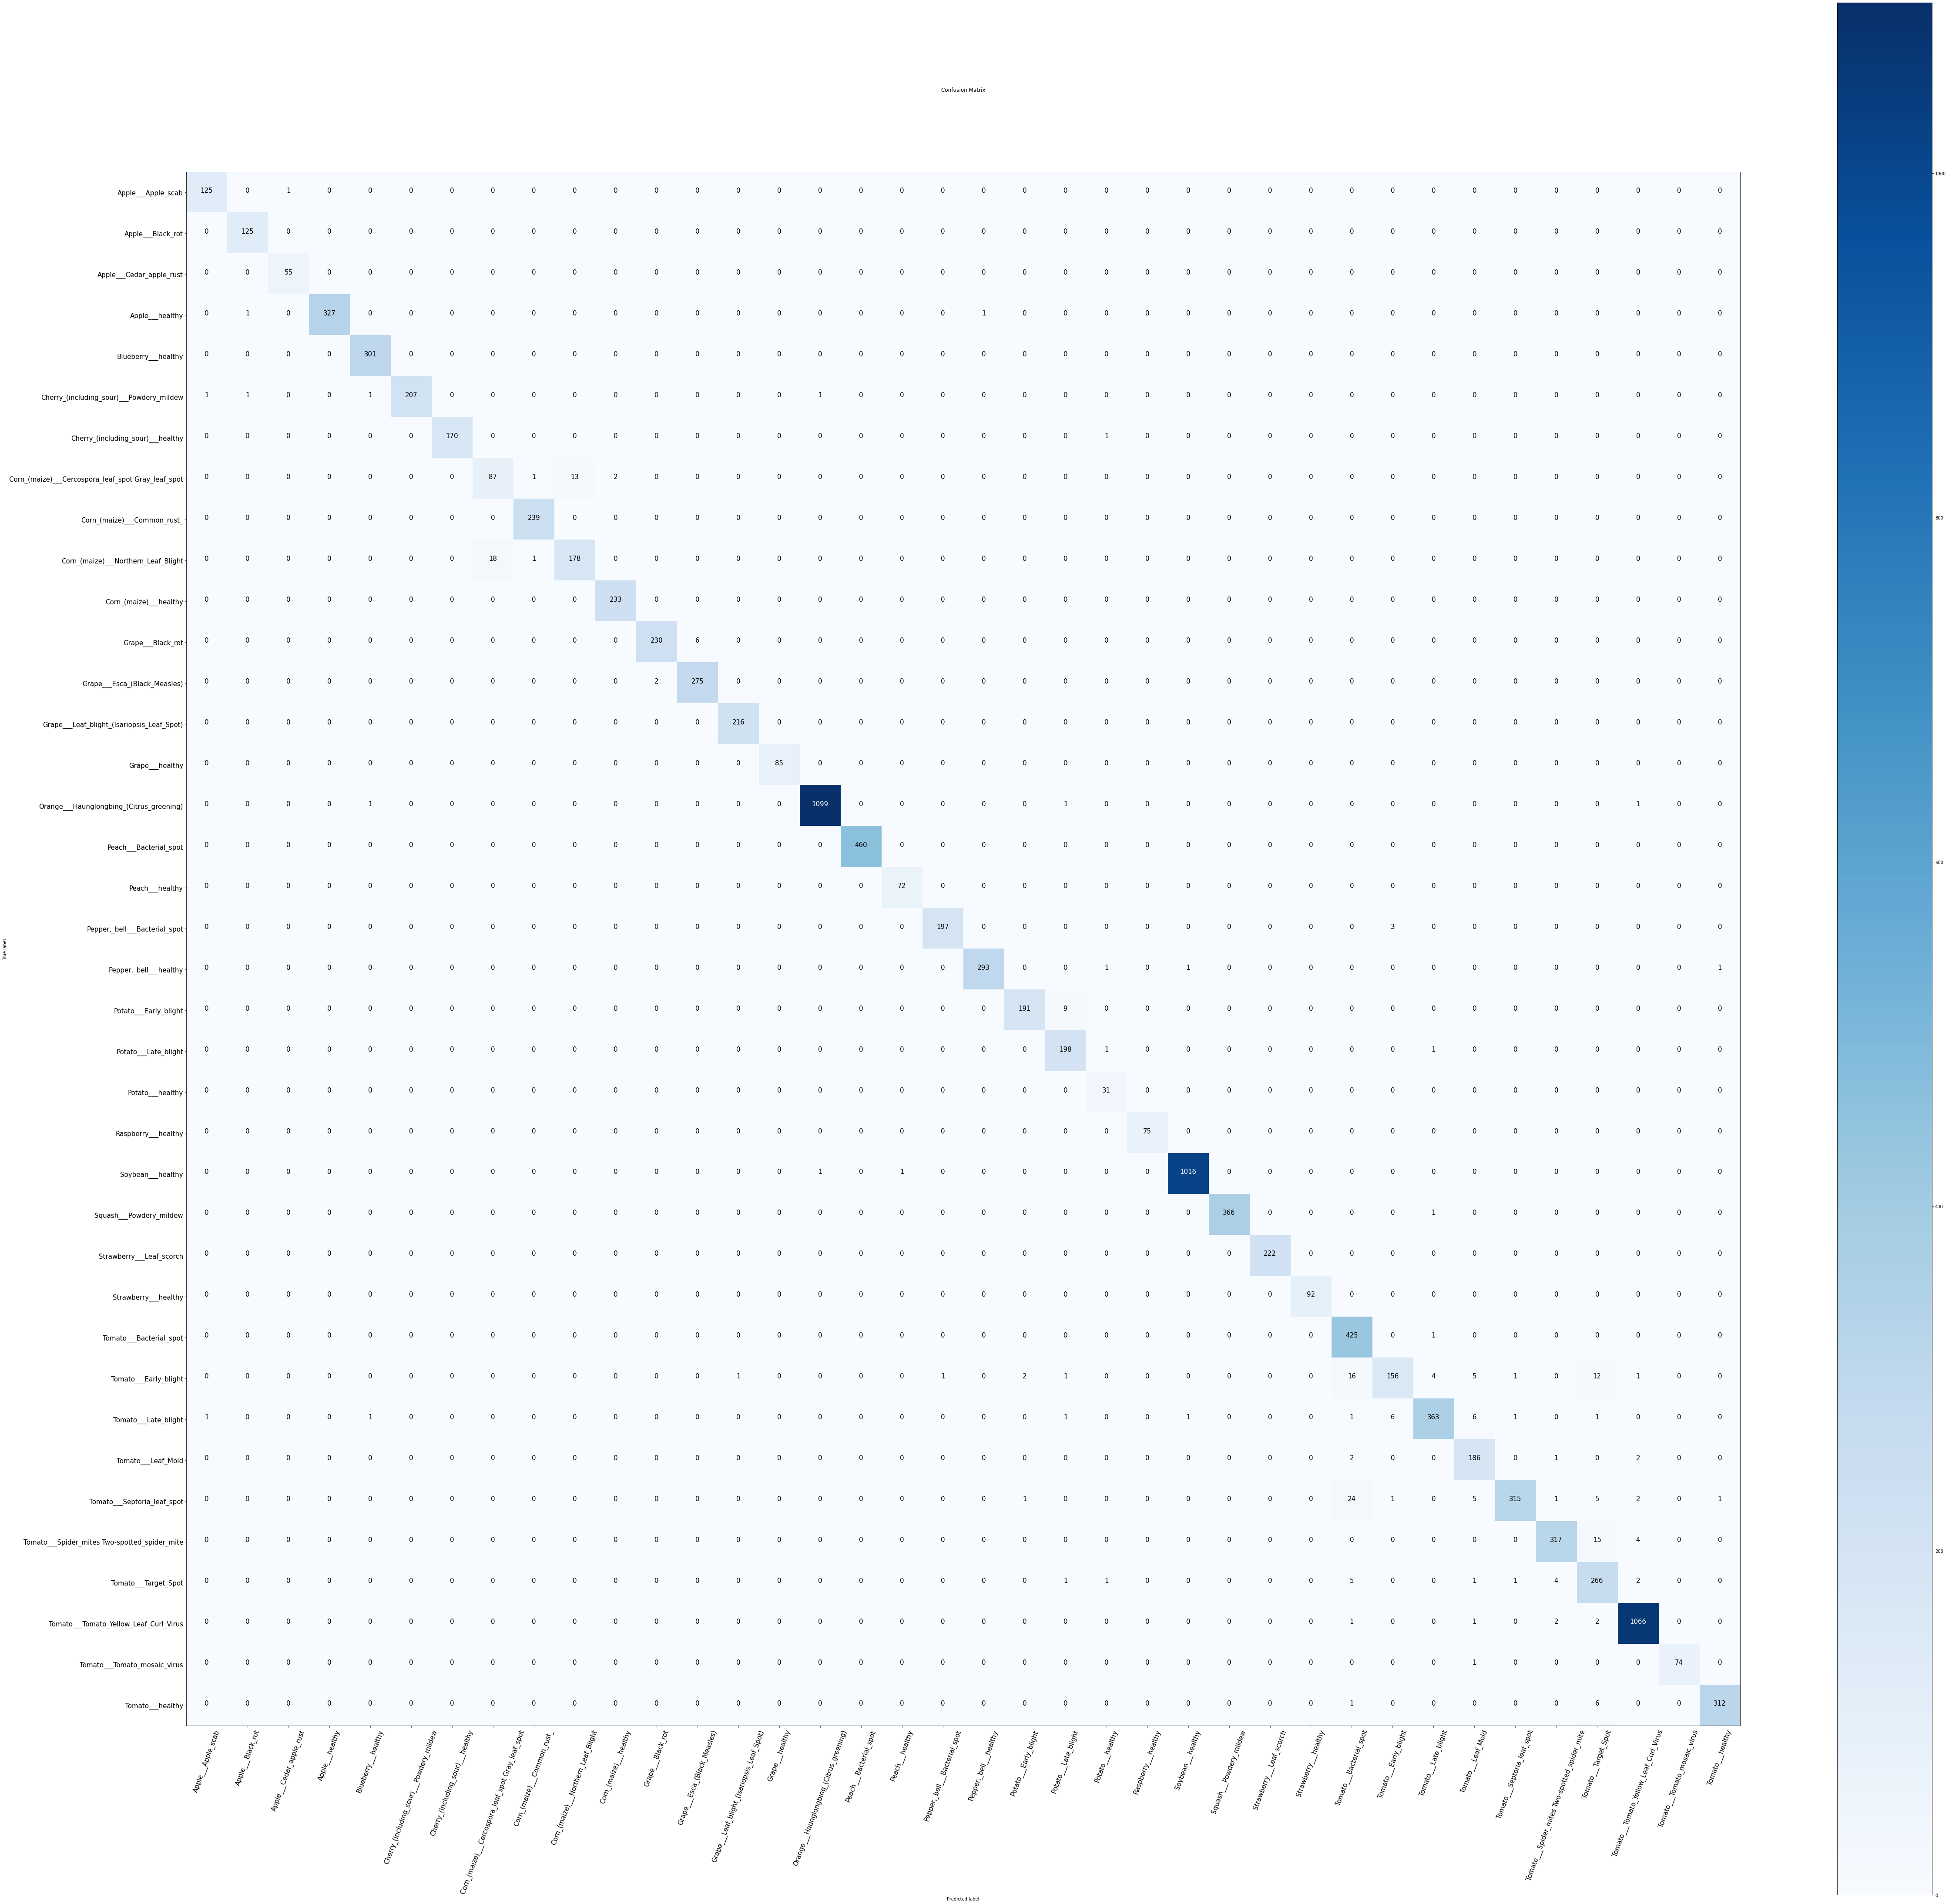

In [35]:
make_confusion_matrix(y_labels, pred_classes , 
                      class_names , 
                      figsize=(80,80))

In [38]:
from sklearn.metrics import classification_report 
print(classification_report(y_labels , pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       126
           1       0.98      1.00      0.99       125
           2       0.98      1.00      0.99        55
           3       1.00      0.99      1.00       329
           4       0.99      1.00      1.00       301
           5       1.00      0.98      0.99       211
           6       1.00      0.99      1.00       171
           7       0.83      0.84      0.84       103
           8       0.99      1.00      1.00       239
           9       0.93      0.90      0.92       197
          10       0.99      1.00      1.00       233
          11       0.99      0.97      0.98       236
          12       0.98      0.99      0.99       277
          13       1.00      1.00      1.00       216
          14       1.00      1.00      1.00        85
          15       1.00      1.00      1.00      1102
          16       1.00      1.00      1.00       460
          17       0.99    

In [39]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'f1-score': 0.9881422924901185,
  'precision': 0.984251968503937,
  'recall': 0.9920634920634921,
  'support': 126},
 '1': {'f1-score': 0.9920634920634921,
  'precision': 0.984251968503937,
  'recall': 1.0,
  'support': 125},
 '10': {'f1-score': 0.9957264957264957,
  'precision': 0.9914893617021276,
  'recall': 1.0,
  'support': 233},
 '11': {'f1-score': 0.982905982905983,
  'precision': 0.9913793103448276,
  'recall': 0.9745762711864406,
  'support': 236},
 '12': {'f1-score': 0.985663082437276,
  'precision': 0.9786476868327402,
  'recall': 0.9927797833935018,
  'support': 277},
 '13': {'f1-score': 0.997690531177829,
  'precision': 0.9953917050691244,
  'recall': 1.0,
  'support': 216},
 '14': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 85},
 '15': {'f1-score': 0.9977303676804359,
  'precision': 0.9981834695731153,
  'recall': 0.9972776769509982,
  'support': 1102},
 '16': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 460},
 '17': {'f1-score': 

In [43]:
# creat empty dictionary 
class_f1_scores = {} 

for k , v in classification_report_dict.items():
  if k== "accuracy":
     break
  else: 
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Apple___Apple_scab': 0.9881422924901185,
 'Apple___Black_rot': 0.9920634920634921,
 'Apple___Cedar_apple_rust': 0.9909909909909909,
 'Apple___healthy': 0.9969512195121951,
 'Blueberry___healthy': 0.9950413223140495,
 'Cherry_(including_sour)___Powdery_mildew': 0.9904306220095694,
 'Cherry_(including_sour)___healthy': 0.9970674486803519,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 0.8365384615384616,
 'Corn_(maize)___Common_rust_': 0.9958333333333333,
 'Corn_(maize)___Northern_Leaf_Blight': 0.9175257731958762,
 'Corn_(maize)___healthy': 0.9957264957264957,
 'Grape___Black_rot': 0.982905982905983,
 'Grape___Esca_(Black_Measles)': 0.985663082437276,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 0.997690531177829,
 'Grape___healthy': 1.0,
 'Orange___Haunglongbing_(Citrus_greening)': 0.9977303676804359,
 'Peach___Bacterial_spot': 1.0,
 'Peach___healthy': 0.993103448275862,
 'Pepper,_bell___Bacterial_spot': 0.9899497487437187,
 'Pepper,_bell___healthy': 0.993220338983051,
 'Pot

In [44]:
f1_scores = pd.DataFrame({"class_name" : list(class_f1_scores.keys()),
                          "f1-score" : list(class_f1_scores.values())}).sort_values("f1-score" , ascending=False)

In [46]:
f1_scores 

,class_name,f1-score
27,Strawberry___healthy,1.000000
23,Raspberry___healthy,1.000000
16,Peach___Bacterial_spot,1.000000
14,Grape___healthy,1.000000
26,Strawberry___Leaf_scorch,1.000000
25,Squash___Powdery_mildew,0.998636
24,Soybean___healthy,0.998035
15,Orange___Haunglongbing_(Citrus_greening),0.997730
13,Grape___Leaf_blight_(Isariopsis_Leaf_Spot),0.997691
6,Cherry_(including_sour)___healthy,0.997067


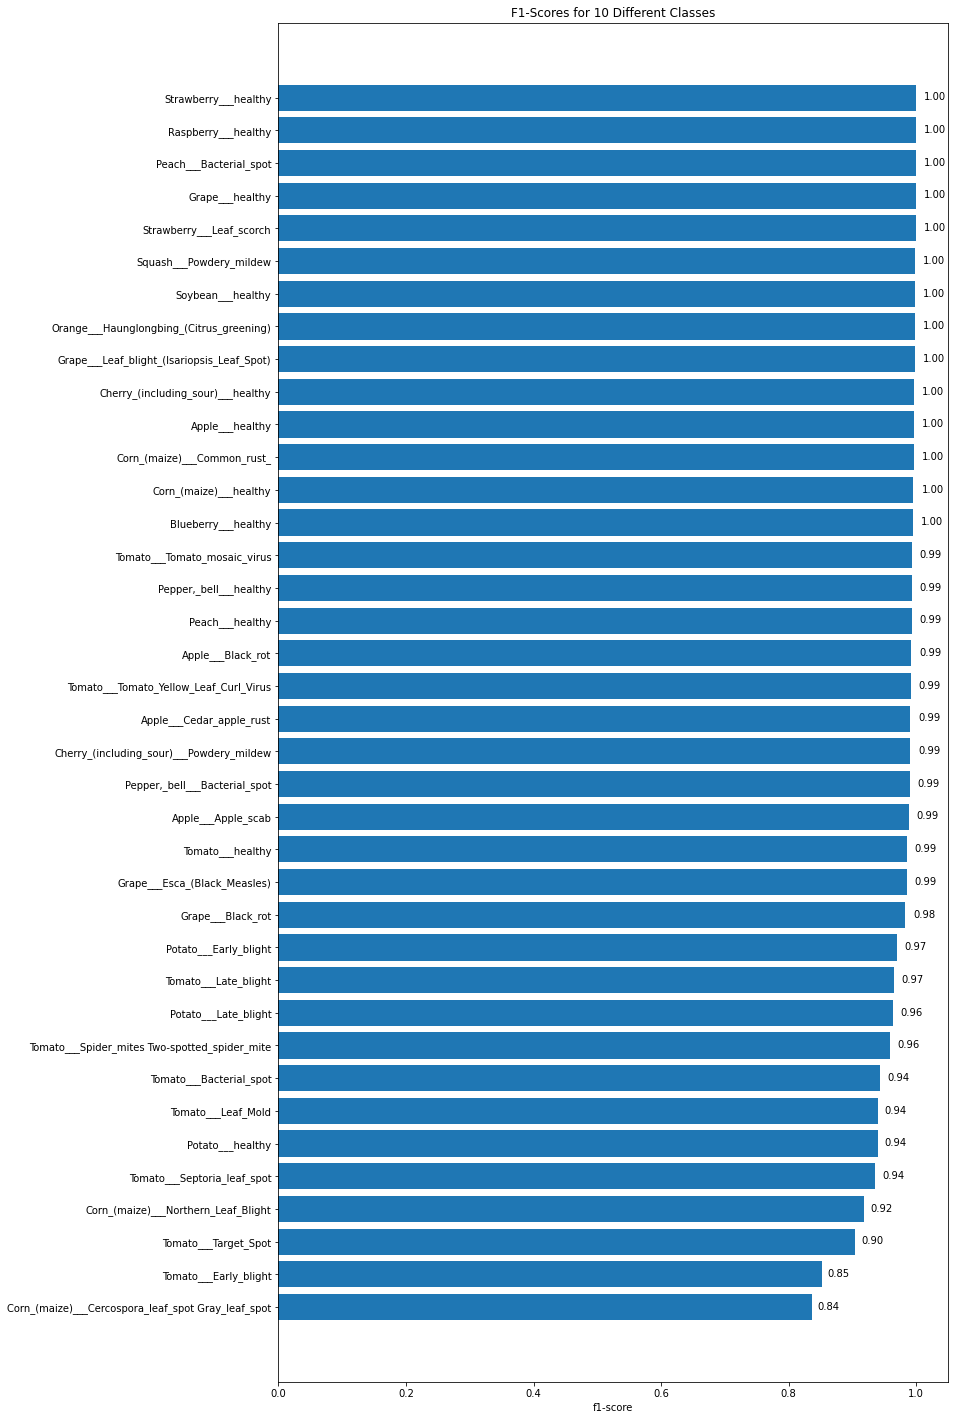

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)